In [192]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
df = pd.read_csv("customer_churn.csv")
df.drop(columns = ["customerID"], axis = 1, inplace = True)
# Ensure that TotalCharges is converted correctly
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop any rows with missing TotalCharges values
df.dropna(inplace=True)

In [193]:
# Convert categorical variables to numeric
yes_no_column = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity",
                 "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                 "PaperlessBilling", "Churn"]

le = LabelEncoder()
for column in yes_no_column:
    df[column] = le.fit_transform(df[column])

In [194]:
# One-hot encoding for categorical columns with more than two categories
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"])

# Scale numeric columns
cols_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [195]:
# Define X and y
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Ensure all data is float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [196]:
# Ensure correct data types and shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Unique labels in y_train: {np.unique(y_train)}")


X_train shape: (5625, 26), y_train shape: (5625,)
Unique labels in y_train: [0. 1.]


In [199]:

# Build and compile the model
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)  # Reduced epochs for quicker testing


Epoch 1/100
176/176 [==============================] - 1s 989us/step - loss: 0.4927 - accuracy: 0.7620
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.7989
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8034
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8052
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8046
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8082
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8096
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8091
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4076 - accu

In [198]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


44/44 [==============================] - 0s 945us/step - loss: 0.4397 - accuracy: 0.7804
Test Accuracy: 0.7803837656974792


In [220]:
y_pred = model.predict(X_test)
y_pred

44/44 [==============================] - 0s 801us/step


array([[0.01705611],
       [0.08153573],
       [0.68881303],
       ...,
       [0.09211257],
       [0.54943895],
       [0.00492327]], dtype=float32)

In [218]:
y_predicted = []

for element in y_pred:
    if element > 0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [227]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1033
         1.0       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(50.722222222222214, 0.5, 'truth')

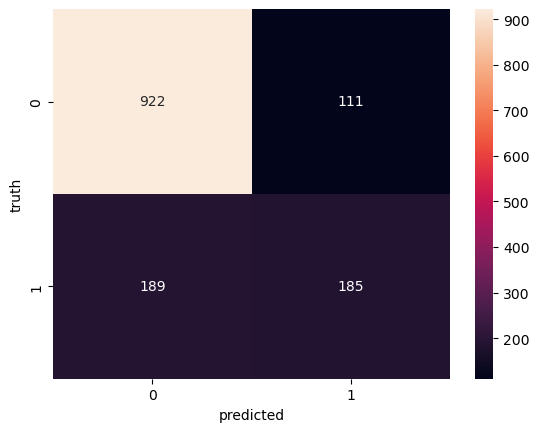

In [228]:
confusion_matrix = confusion_matrix(y_test, y_predicted)
import seaborn as sns
plt.figure()
sns.heatmap(confusion_matrix, annot = True, fmt = "d")
plt.xlabel("predicted")
plt.ylabel("truth")